In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
plt.rcParams['figure.figsize'] = (12, 6)

# Problem Statement
A retail company "ABC Private Limited" wants to understand the customer purchase behaviour
(specifically, purchase amount) against various products of different categories. They have shared
purchase summary of various customers for selected high volume products from last month. The
data set also contains customer demographics (age, gender, marital status, city_type,
stay_in_current_city), product details (product_id and product category) and Total
purchase_amount from last month.
Now, they want to build a model to predict the purchase amount of customer against
products which will help them to create personalized offer for customers against different products.

### Import the dataset

In [2]:
df_train = pd.read_csv("archive\\train.csv")
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_test = pd.read_csv("archive\\test.csv")
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
df = pd.concat([df_train, df_test])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Understanding the data

In [5]:
df.shape

(783667, 12)

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [8]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [9]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


### Data Cleaning

In [10]:
df.drop(columns= ['User_ID', 'Product_ID'], axis = 1, inplace = True)

In [11]:
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})

In [12]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [13]:
df['Age'] = df['Age'].map({'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7})

In [14]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [15]:
df_category = pd.get_dummies(df['City_Category'], dtype= 'int')

In [16]:
df = pd.concat([df, df_category], axis = 1)
df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,0,1,10,A,2,0,3,NaN,NaN,8370.0,1,0,0
1,0,1,10,A,2,0,1,6.0,14.0,15200.0,1,0,0
2,0,1,10,A,2,0,12,NaN,NaN,1422.0,1,0,0
3,0,1,10,A,2,0,12,14.0,NaN,1057.0,1,0,0
4,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,0,1


In [17]:
df.drop(['City_Category'], axis = 1, inplace = True)

In [18]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [19]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].str.replace('+', '')

### Handling Missing Values

In [20]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [21]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [22]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [23]:
df.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,A,B,C
0,0,1,10,2,0,3,8.0,16.0,8370.0,1,0,0
1,0,1,10,2,0,1,6.0,14.0,15200.0,1,0,0
2,0,1,10,2,0,12,8.0,16.0,1422.0,1,0,0
3,0,1,10,2,0,12,14.0,16.0,1057.0,1,0,0
4,1,7,16,4,0,8,8.0,16.0,7969.0,0,0,1


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Gender                      783667 non-null  int64  
 1   Age                         783667 non-null  int64  
 2   Occupation                  783667 non-null  int64  
 3   Stay_In_Current_City_Years  783667 non-null  object 
 4   Marital_Status              783667 non-null  int64  
 5   Product_Category_1          783667 non-null  int64  
 6   Product_Category_2          783667 non-null  float64
 7   Product_Category_3          783667 non-null  float64
 8   Purchase                    550068 non-null  float64
 9   A                           783667 non-null  int32  
 10  B                           783667 non-null  int32  
 11  C                           783667 non-null  int32  
dtypes: float64(3), int32(3), int64(5), object(1)
memory usage: 68.8+ MB


In [25]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int64')
df['Product_Category_2'] = df['Product_Category_2'].astype('int64')
df['Product_Category_3'] = df['Product_Category_3'].astype('int64')

In [26]:
df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
A                                  0
B                                  0
C                                  0
dtype: int64

### Data Visualization

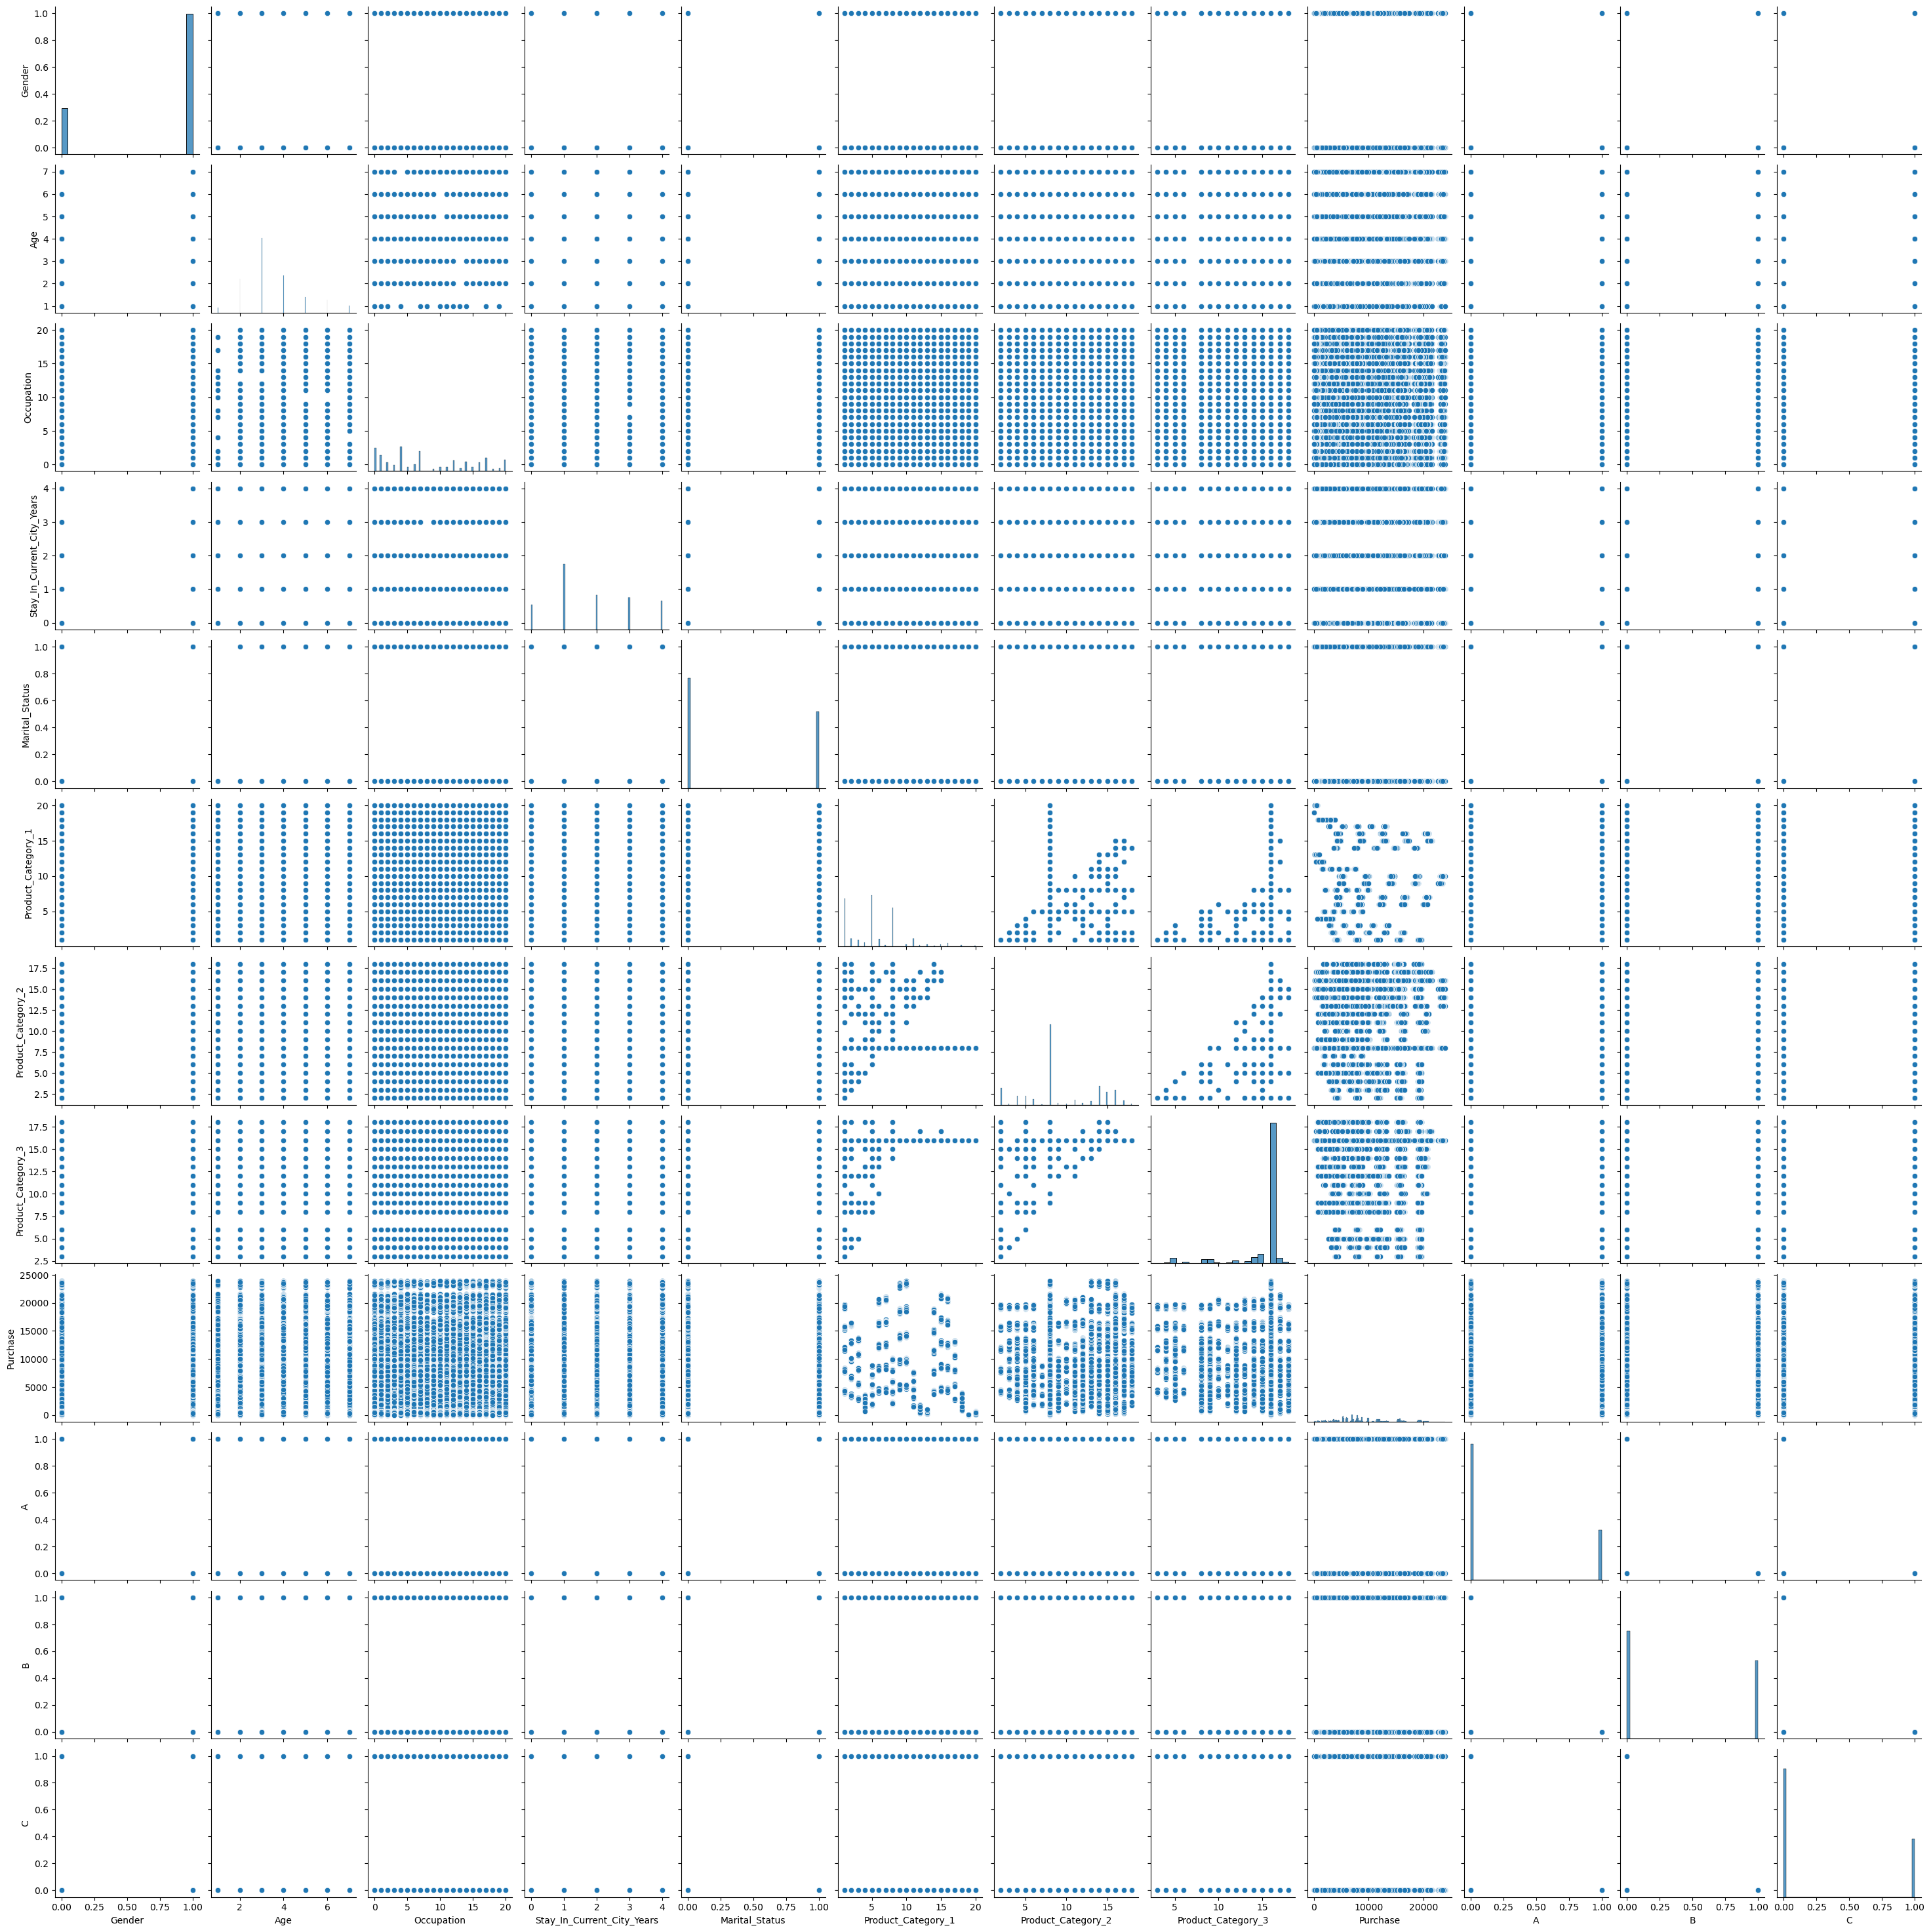

In [34]:
sb.pairplot(df)
plt.show()

### Univariate 

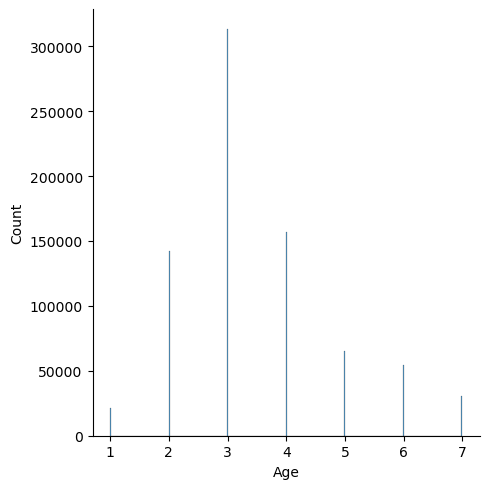

In [27]:
sb.displot(df['Age'])

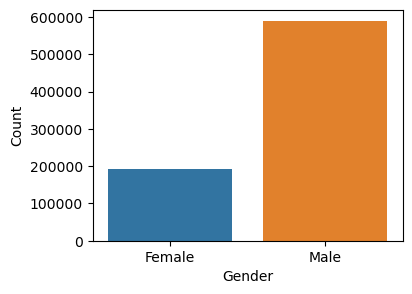

In [28]:
plt.figure(figsize = (4, 3))
sb.countplot(df, x = "Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

### Multivariate 

<Axes: xlabel='Age', ylabel='Purchase'>

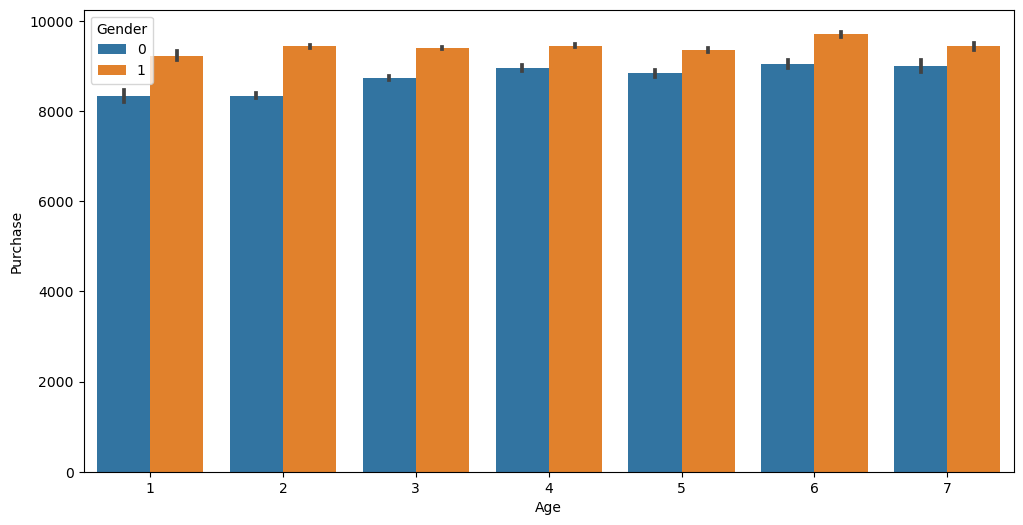

In [29]:
# Age vs Purchase
sb.barplot(x = 'Age', y = 'Purchase', hue = 'Gender', data = df)

<Axes: xlabel='Occupation', ylabel='Purchase'>

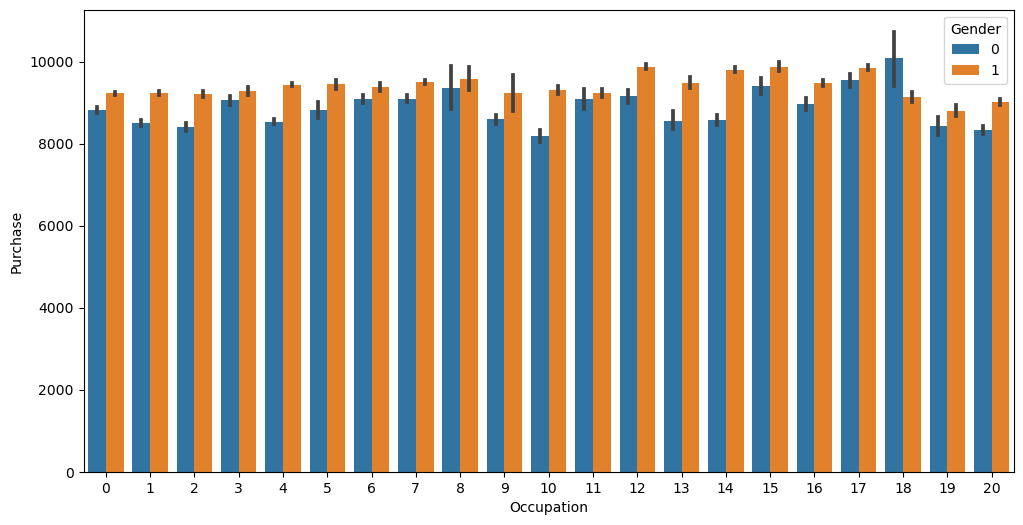

In [30]:
# Occupation vs Purchase
sb.barplot(x = 'Occupation', y = 'Purchase', hue = 'Gender', data = df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

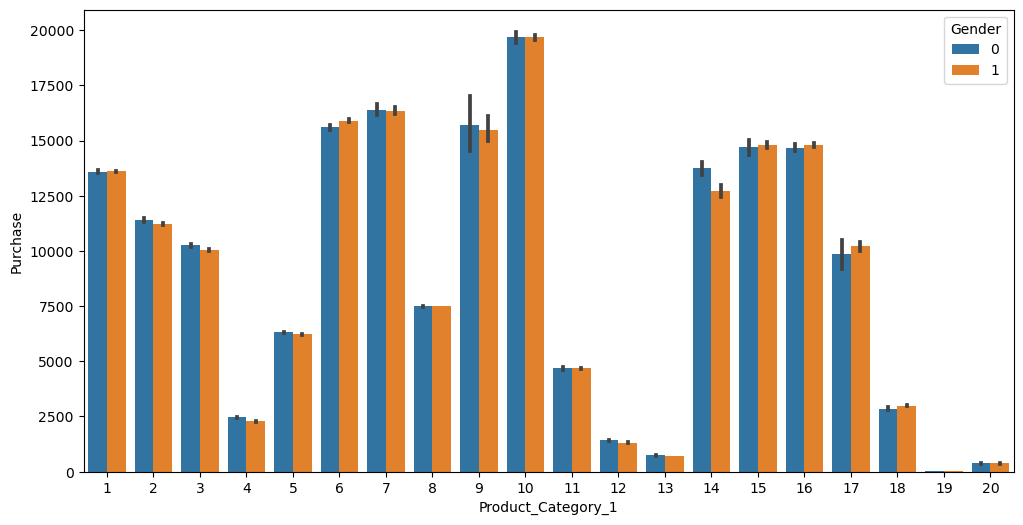

In [31]:
# Product_Category_1 vs Purchase
sb.barplot(x = 'Product_Category_1', y = 'Purchase', hue = 'Gender', data = df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

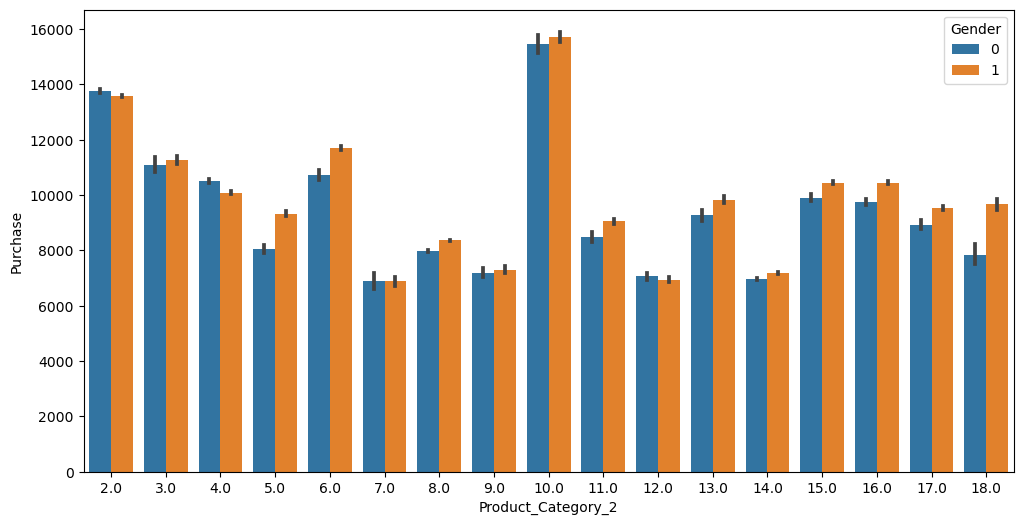

In [32]:
# Product_Category_2 vs Purchase
sb.barplot(x = 'Product_Category_2', y = 'Purchase', hue = 'Gender', data = df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

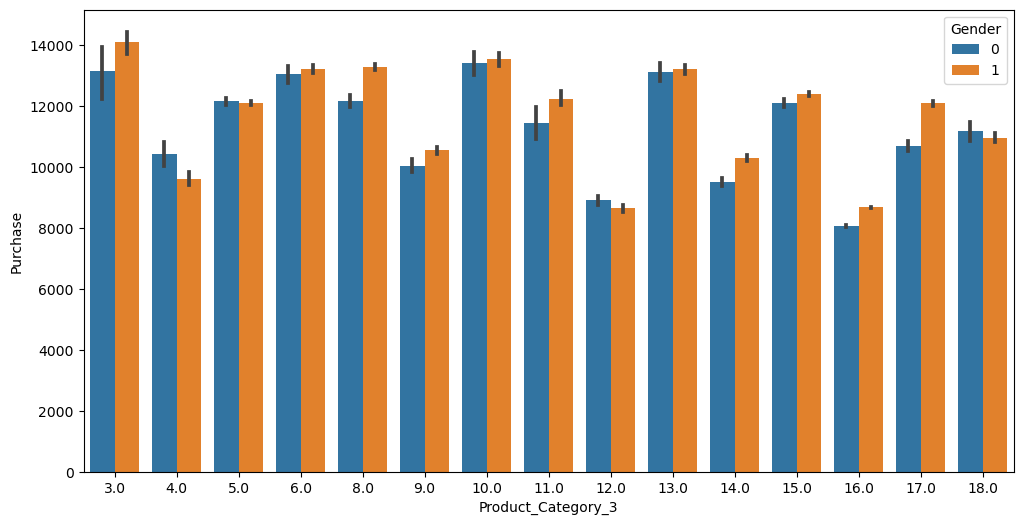

In [33]:
# Product_Category_3 vs Purchase
sb.barplot(x = 'Product_Category_3', y = 'Purchase', hue = 'Gender', data = df)

### Identifying the outliers

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Gender'),
  Text(1, 0, 'Age'),
  Text(2, 0, 'Occupation'),
  Text(3, 0, 'Stay_In_Current_City_Years'),
  Text(4, 0, 'Marital_Status'),
  Text(5, 0, 'Product_Category_1'),
  Text(6, 0, 'Product_Category_2'),
  Text(7, 0, 'Product_Category_3'),
  Text(8, 0, 'Purchase'),
  Text(9, 0, 'A'),
  Text(10, 0, 'B'),
  Text(11, 0, 'C')])

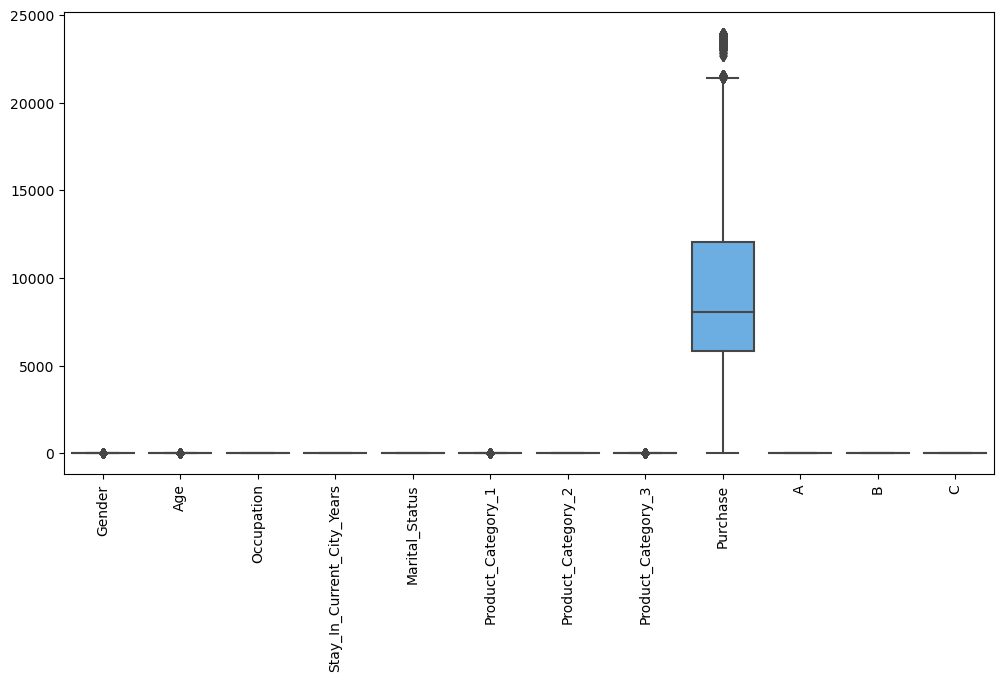

In [29]:
sb.boxplot(df)
plt.xticks(rotation=90)

### Correlation

<Axes: >

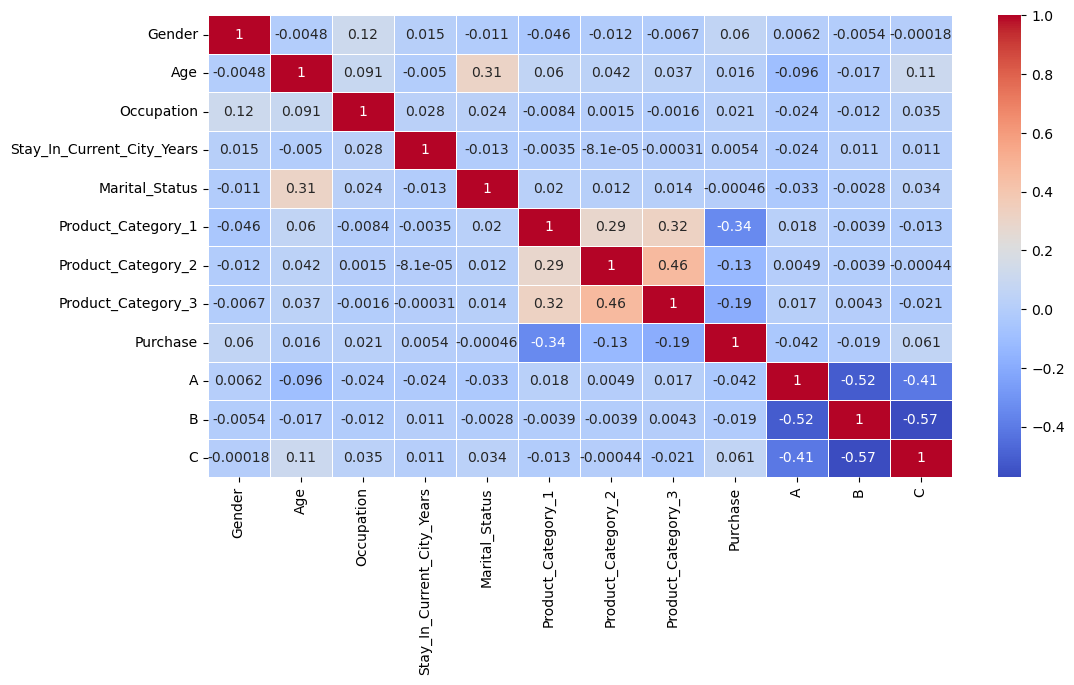

In [30]:
sb.heatmap(df.corr(), annot = True, cmap='coolwarm', linewidths=0.5)

### Feature Selection

In [31]:
df_test = df[df['Purchase'].isnull()]
df_train = df[~df['Purchase'].isnull()]
print(df_train.shape)
print(df_test.shape)

(550068, 12)
(233599, 12)


In [32]:
X = df_train.drop('Purchase', axis =1)
y = df_train['Purchase']
print(X.shape)
print(y.shape)

(550068, 11)
(550068,)


### train test split

In [33]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (440054, 11)
y_train:  (440054,)
x_test:  (110014, 11)
y_test:  (110014,)


### Feature Scaling

In [199]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)